In [55]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import time

from bofire.data_models.features.api import (
    CategoricalInput,
    ContinuousInput,
    ContinuousOutput,
    Input,
)

from IPython.display import clear_output

import bofire.strategies.api as strategies
from bofire.data_models.strategies.api import SoboStrategy
from bofire.data_models.acquisition_functions.api import qEI

from bofire.data_models.domain.api import Domain

from bofire.data_models.domain.api import Constraints, Domain, Inputs, Outputs

from bofire.data_models.objectives.api import MinimizeObjective

Explore Himmelblau optimization function

In mathematical optimization, Himmelblau's function is a multi-modal function, used to test the performance of optimization algorithms.

In [2]:
def himmelblau(x_1, x_2):
    return ((x_1**2 + x_2 - 11)**2+(x_1 + x_2**2 -7)**2)

Explore the function

In [24]:
x_1_vec = np.linspace(-6, 6, 100)
x_2_vec = np.linspace(-6, 6, 100)

x_1, x_2 = np.meshgrid(x_1_vec, x_2_vec)
results = himmelblau(x_1, x_2)

x_minima = [
        [3.0, 2.0],
        [-2.805118, 3.131312],
        [-3.779310, -3.283186],
        [3.584428, -1.848126],
    ]
y_minima = np.zeros(4)


In [25]:
fig = go.Figure(data=go.Contour(z=results, x=x_1_vec, y=x_2_vec, contours_coloring="heatmap"))
fig.update_layout(
    title='Himmelblau Function',
    autosize=False,
    width=750,
    height=750,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title='x_1',
        yaxis_title='x_2',
        zaxis_title='y',
    ))
for i in range(4):
    fig.add_trace(go.Scatter(x=[x_minima[i][0]], y=[x_minima[i][1]],
                             mode='markers', showlegend=False,
                             marker=dict(size=10, color='red')))
fig.show()

In [61]:
input_feature_1 = ContinuousInput(key="x_1", bounds=(-6, 6))
input_feature_2 = ContinuousInput(key="x_2", bounds=(-6, 6))

objective = MinimizeObjective(w=1.0)

output_feature = ContinuousOutput(key="y", objective=objective)

domain = Domain(
    inputs=Inputs(features=[input_feature_1, input_feature_2]),
    outputs=Outputs(features=[output_feature]),
)


In [62]:
samples = domain.inputs.sample(10, seed=19)
y = []
for i, row in samples.iterrows():
    y.append(himmelblau(row["x_1"], row["x_2"]))
samples["y"] = y

In [63]:
samples

,x_1,x_2,y
0,5.215966,-4.098846,372.085855
1,3.012808,-2.506356,24.884414
2,1.031427,-2.073653,147.019580
3,1.883801,2.827790,29.672341
4,-2.179541,-4.737540,296.670642
5,-3.511045,1.337221,83.189139
6,4.239503,1.131342,67.878721
7,2.869958,1.455373,5.758643
8,-4.694544,-3.929062,64.557441
9,-3.292669,-0.170710,105.448251


In [64]:
def plot_himmelblau_opt(samples):
    fig = go.Figure(data=go.Contour(z=results, x=x_1_vec, y=x_2_vec, contours_coloring="heatmap"))
    fig.update_layout(
        title=f'Best so far: {round(samples["y"].min(), 2)}',
        autosize=False,
        width=750,
        height=750,
        margin=dict(l=65, r=50, b=65, t=90),
        scene=dict(
            xaxis_title='x_1',
            yaxis_title='x_2',
            zaxis_title='y',
        ))
    #for i in range(4):
    #    fig.add_trace(go.Scatter(x=[x_minima[i][0]], y=[x_minima[i][1]],
    #                            mode='markers', showlegend=False,
    #                            marker=dict(size=10, color='red')))
    fig.add_trace(go.Scatter(x=samples["x_1"], y=samples["x_2"], mode='lines', showlegend=False, line=dict(color='blue', width=2)))
    return fig

In [65]:
for i in range(30):

    sobo_strategy_data_model = SoboStrategy(domain=domain, acquisition_function=qEI(), seed=19)

    sobo_strategy = strategies.map(sobo_strategy_data_model)

    sobo_strategy.tell(experiments=samples)

    new_sample = sobo_strategy.ask(candidate_count=1)

    y = []
    for i, row in new_sample.iterrows():
        y.append(himmelblau(row["x_1"], row["x_2"]))

    new_sample["y"] = y
    samples = pd.concat([samples, new_sample], join="inner")
    clear_output(wait=True)
    fig = plot_himmelblau_opt(samples)
    fig.show()

    print(f"Best so far: {samples['y'].min()}")

    time.sleep(1)

    

Best so far: 0.109468899615187


Should we visualize (e.g., euclidian) distance to all four minima points (four line plots over iterations)

# Welcome to BoFire

Welcome to the official documentation of BoFire, a powerful Python package that serves as a comprehensive framework for experimental designs. BoFire is designed to empower researchers, data scientists, engineers, and enthusiasts who are venturing into the exciting world of Design of Experiments (DoE) and Bayesian optimization (BO) techniques.

### What is BoFire?

BoFire is a cutting-edge Python library that provides robust and flexible tools for implementing DoE and BO techniques. These methodologies are crucial in various fields such as machine learning, engineering, and scientific research, where they are used to optimize processes and make efficient, data-driven decisions.

### Why BoFire?
With BoFire, you can streamline your experimental design process and enhance the efficiency of your research. The package offers:

**DoE Framework**: BoFire provides a wide range of experimental design techniques, allowing you to choose the one that best fits your research needs.

**BO framework**: BoFire implements advanced Bayesian optimization algorithms, enabling you to iteratively find your optimum with high sample efficiency.

**Ease of Use**: BoFire’s problem specifications are json serializable allowing use in RESTful APIs.

**Flexibility**: Whether you’re tuning hyperparameters of a machine learning model, optimizing a manufacturing process, or conducting a scientific experiment, BoFire is versatile enough to handle it all.


In [3]:
import numpy as np
import plotly.graph_objects as go

# Assume we have a Bayesian optimization process
x = np.linspace(0, 10, 100)  # x values
mu = np.sin(x)  # mean values (for example, sin function)
sigma = np.abs(np.cos(x)/2)  # standard deviation values (for example, absolute value of cos function)

# Create the "sausage plot"
fig = go.Figure([
    go.Scatter(
        name='Mean',
        x=x,
        y=mu,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=x,
        y=mu + sigma,
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=x,
        y=mu - sigma,
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])

fig.update_layout(
    yaxis_title='f(x)',
    xaxis_title='x',
    title='Sausage Plot for Bayesian Optimization',
    hovermode="x"
)

fig.show()


c:\Users\chrihaas\AppData\Local\miniforge3\envs\bofire_hack\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


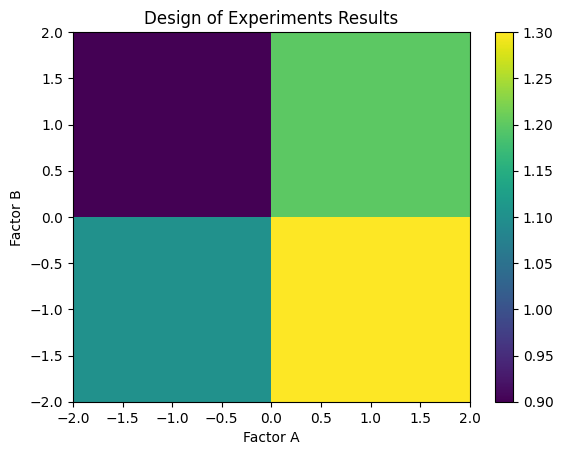

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Let's assume we have two factors, A and B
A = [-1, 1]  # Low and high levels of factor A
B = [-1, 1]  # Low and high levels of factor B

# Create a grid of points
x, y = np.meshgrid(A, B)

# Assume we have some results from our experiments
z = np.array([[1.1, 1.3],  # Results with A low
              [0.9, 1.2]]) # Results with A high

# Create a figure
fig, ax = plt.subplots()

# Plot the results
c = ax.pcolormesh(x, y, z, cmap='viridis', shading='auto')

# Add a colorbar
fig.colorbar(c, ax=ax)

# Set labels
ax.set_xlabel('Factor A')
ax.set_ylabel('Factor B')
ax.set_title('Design of Experiments Results')

# Show the plot
plt.show()


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Points of the cube corners
vertices = [
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
]

# List of sides' polygons of the figure
faces = [
    [vertices[j] for j in [4]],
    vertices[5:6],
    vertices[6:7],
    vertices[7:8]
]

ax.scatter([v[0] for v in vertices], 
           [v[2] for v in vertices],
           zs=[v[2] for v in vertices])

ax.set_xlabel('X₁')
ax.set_ylabel('X₂')
ax.set_zlabel('X₃')

plt.show()


c:\Users\chrihaas\AppData\Local\miniforge3\envs\bofire_hack\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


ModuleNotFoundError: No module named 'mpl_toolkits.mplot3d'

In [4]:
import mpl_toolkits.~plot3d.


ModuleNotFoundError: No module named 'mpl_toolkits.mplot3d'

In [5]:
import plotly.graph_objects as go

# Points of the cube corners
vertices = [
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
]

x, y, z = zip(*vertices)

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(scene=dict(
    xaxis_title='X₁',
    yaxis_title='X₂',
    zaxis_title='X₃'),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10))

fig.show()
